# OH - 19
### Favio Vázquez

## The problem: Customer Churn

![](https://www.insideselfstorage.com/sites/insideselfstorage.com/files/styles/article_featured_retina/public/Sad-Customer-Service.jpg?itok=S9sd0R3T)
Credit:https://www.insideselfstorage.com/customer-service/7-deadly-customer-service-situations-self-storage-and-how-handle-them

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Each row represents a customer, each column contains customer’s attributes.

The data set includes information about:

- Customers who left within the last month – the column is called **Churn**
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## El problema: la pérdida de clientes

![](https://www.insideselfstorage.com/sites/insideselfstorage.com/files/styles/article_featured_retina/public/Sad-Customer-Service.jpg?itok=S9sd0R3T)
Crédito: https: //www.insideselfstorage.com/customer-service/7-deadly-customer-service-situations-self-storage-and-how-handle-them

La pérdida de clientes se define como cuando los clientes o suscriptores dejan de hacer negocios con una empresa o servicio.

Cada fila representa un cliente, cada columna contiene los atributos del cliente.

El conjunto de datos incluye información sobre:

- Clientes que se fueron en el último mes: la columna se llama **Churn**
- Servicios para los que se ha suscrito cada cliente: teléfono, varias líneas, Internet, seguridad en línea, respaldo en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas
- Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.
- Información demográfica sobre los clientes: sexo, rango de edad y si tienen pareja y dependientes

## Comprender el contexto y el problema empresarial

Antes de dedicar tiempo a intentar resolver un problema comercial, debemos estar seguros de que tenemos un problema. Para eso necesitamos tener reuniones con las personas cercanas al problema empresarial y los carniceros.

Tuvimos dos reuniones, una con el área comercial y otra con los principales ejecutivos. Esto es lo que escuchamos:

- Los clientes se van pero no sabemos por qué.
- Tenemos 1 mes de datos de clientes donde sabemos cuáles se quedaron y cuáles se fueron.
- La rotación de clientes no puede superar el 15% mensual debido a nuestros cálculos.
- No conocemos el impacto financiero de perder un cliente.
- Podemos dar un vale por USD \$ 500.
- El valor de vida útil estimado para un cliente es USD \$ 7500.

Tras esas reuniones tenemos que comprobar los datos existentes en la empresa y encontrar información útil en ella. Supongamos que lo hicimos y después de un proceso de integración de datos creamos un conjunto de datos completo para nuestros clientes y su información. Recuerde que estamos trabajando con una empresa de telecomunicaciones.

## Bibliotecas

In [ ]:
!pip install datatable

In [ ]:
!pip install plotly

In [1]:
import pandas as pd
import datatable as dt
from datatable import f, min, max, mean
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as stats
import warnings
import numpy as np
warnings.filterwarnings("ignore")

## Cargar datos

In [2]:
df = dt.fread("./data/churn-data.csv")

In [3]:
df.head()

<Frame#7facde2a7780 10x21>

In [4]:
df.shape

(7043, 21)

El color significa el tipo de datos donde el rojo denota una cadena, el verde denota int y el azul significa flotante.

## ¿Cuántos clientes se han ido?

In [5]:
df[f.Churn == "Yes", dt.count()]

<Frame#7face17c9180 1x1>

In [6]:
1869/7043

0.2653698707936959

Se han ido 1869 clientes, es decir, el 26% de nuestros clientes. Entonces, si recordamos las métricas del negocio, tenemos un problema.

## ¿Cuánto dinero hemos perdido debido a la pérdida de clientes?

In [7]:
df[:, dt.count(), dt.by(dt.f.Churn)]

<Frame#7face17c9690 2x2>

In [8]:
df[dt.f.Churn == 'Yes', 'TotalCharges'].sum1()

2862926.9000000027

Hemos perdido $ 2.862.926 debido a la pérdida de clientes. Intentemos resolver este problema.

## Exploración de datos

In [9]:
df_pandas = df.to_pandas()

In [10]:
df_pandas.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female          False     Yes         No       1           No   
1  5575-GNVDE    Male          False      No         No      34          Yes   
2  3668-QPYBK    Male          False      No         No       2          Yes   
3  7795-CFOCW    Male          False      No         No      45           No   
4  9237-HQITU  Female          False      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [11]:
def diagnostic_plots(df_pandas, variable):
    
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.histplot(data = df_pandas, x=variable, bins=30, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df_pandas[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(x=df_pandas[variable])
    plt.title('Boxplot')
    
    plt.show()

In [12]:
num_columns=df_pandas.select_dtypes(include=["number"]).columns
num_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

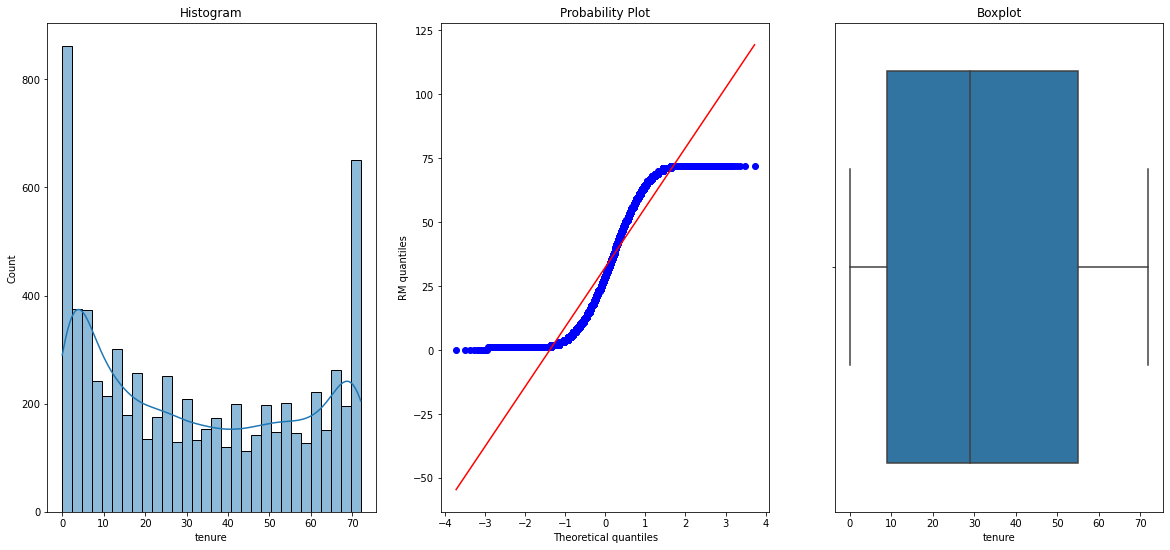

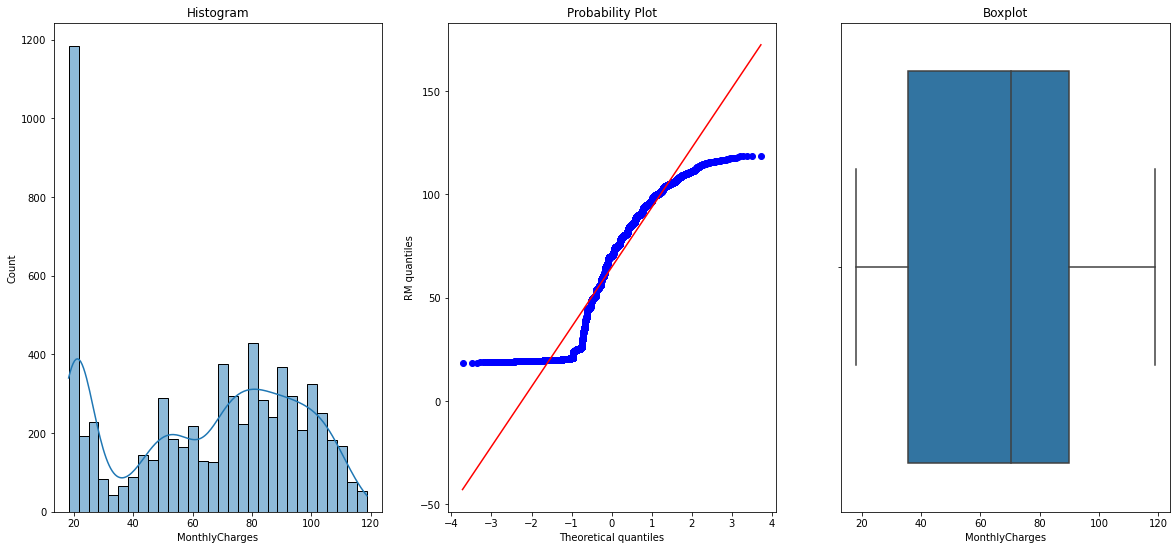

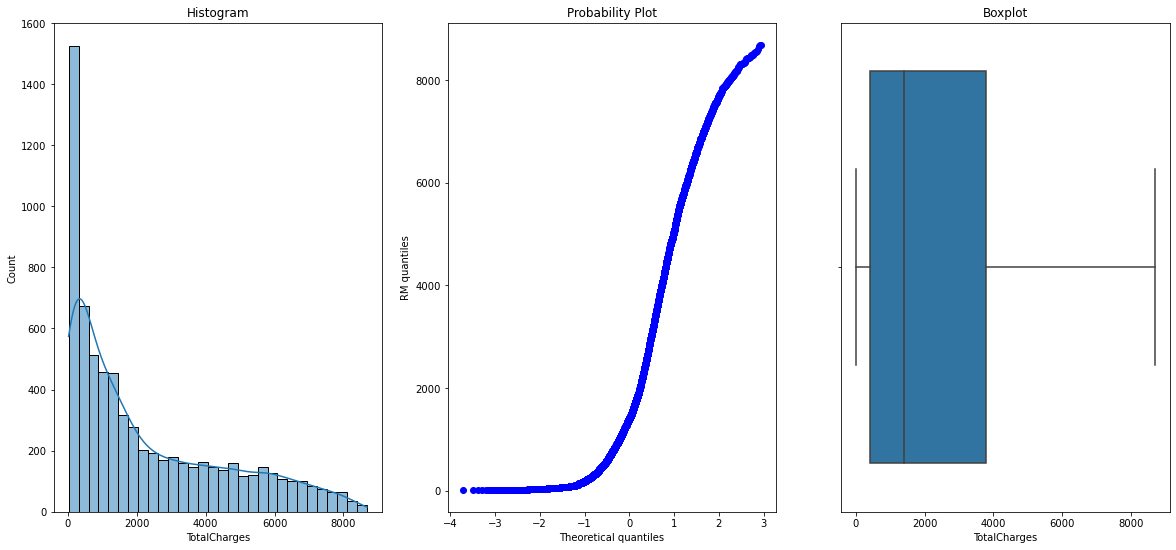

In [13]:
for i in num_columns:
    diagnostic_plots(df_pandas,i)

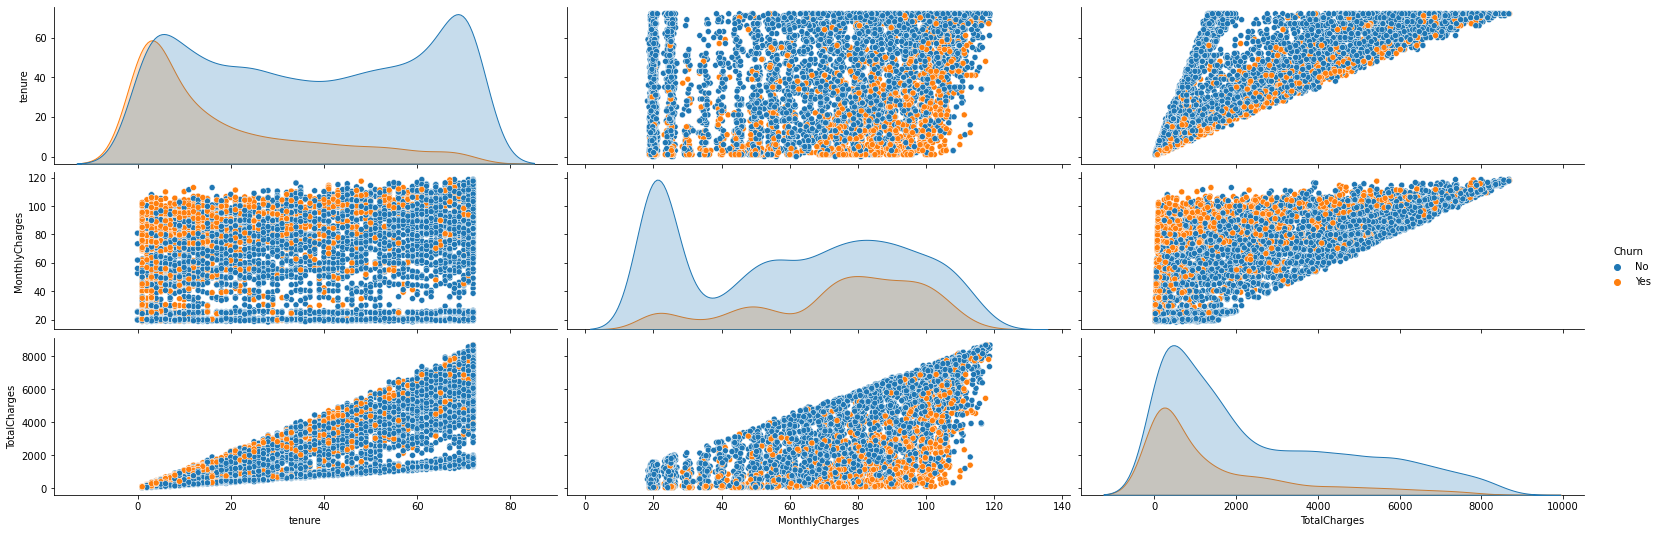

In [14]:
sns.pairplot(df_pandas.drop("SeniorCitizen",axis=1),hue="Churn",aspect=3);

In [15]:
fig = px.histogram(df_pandas, x="Churn")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(df_pandas, x="Churn", color="SeniorCitizen")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df_pandas, x="Churn", color="OnlineSecurity", barmode="group")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [17]:
fig = px.box(df_pandas, x='Churn', y = 'tenure')
fig.show()

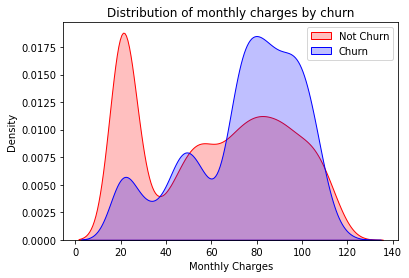

In [18]:
ax = sns.kdeplot(df_pandas.MonthlyCharges[(df_pandas["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df_pandas.MonthlyCharges[(df_pandas["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [19]:
corr = df_pandas.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

heat = go.Heatmap(
    z=corr.mask(mask),
    x=corr.columns,
    y=corr.columns,
    colorscale=px.colors.diverging.RdBu,
    zmin=-1,
    zmax=1
)

pio.templates.default = "plotly_white"


fig.update_xaxes(side="bottom")

fig.update_layout(
    title_text='Heatmap', 
    title_x=0.5, 
    width=1000, 
    height=1000,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_zeroline=False,
    yaxis_zeroline=False,
    yaxis_autorange='reversed',
    template='plotly_white'
)

fig=go.Figure(data=[heat])
fig.show()

## Limpieza de datos

In [20]:
df.names

('customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn')

In [21]:
df.stypes

(stype.str32,
 stype.str32,
 stype.bool8,
 stype.str32,
 stype.str32,
 stype.int32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.float64,
 stype.float64,
 stype.str32)

In [22]:
## missing values
dt.math.isna(df).sum()

<Frame#7face31231e0 1x21>

Solo tenemos 11 valores faltantes en la columna TotalCharges.

In [23]:
## Delete missing rows
df = df[dt.rowall(dt.f[:] != None), :]

In [24]:
# Delete customerID
del df[:, "customerID"]

In [25]:
df.head()

<Frame#7face3123960 10x20>

In [26]:
# Enconde Churn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[:, 'Churn'] = dt.Frame(le.fit_transform(np.ravel(df[:, 'Churn'])))

In [27]:
# Function for OHE
def ohe_columns(columns,df):
    df_work = df.copy()
    for column in columns:
        df_ohe = dt.str.split_into_nhot(df_work[column])
        df_ohe.names = [f'{column}_{col}' for col in df_ohe.names]
        df_work.cbind(df_ohe)
    return df_work

In [28]:
# Select categorical columns
categorical_columns = df[:, str].names

In [29]:
# Get final df after OHE
df_final = ohe_columns(categorical_columns,df)

In [30]:
# Delete orignal columns
del df_final[:, categorical_columns]

In [31]:
df_final.head()

<Frame#7face31238a0 10x46>

In [ ]:
df_final.to_csv("churn_data_cleaned.csv")

## Modeling

In [ ]:
!pip install h2o

In [32]:
import h2o

In [33]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.12" 2021-07-20 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.12+8-LTS-237); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.12+8-LTS-237, mixed mode)
  Starting server from /Users/fvazquez/opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/fk/wgqmzjm522921ms9wlrpvm800000gn/T/tmps_a4bww2
  JVM stdout: /var/folders/fk/wgqmzjm522921ms9wlrpvm800000gn/T/tmps_a4bww2/h2o_fvazquez_started_from_python.out
  JVM stderr: /var/folders/fk/wgqmzjm522921ms9wlrpvm800000gn/T/tmps_a4bww2/h2o_fvazquez_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       America/Mexico_City
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.4
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_fvazquez_08dl5a
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.8 final
--------------------------  ------------------------------------------------------------------

### GBM with H2O

In [34]:
dataset = h2o.import_file("./data/churn_data_cleaned.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [35]:
dataset.head()

SeniorCitizen tenure MonthlyCharges TotalCharges Churn gender_Male gender_Female Partner_No Partner_Yes Dependents_No Dependents_Yes PhoneService_No PhoneService_Yes MultipleLines_No phone service MultipleLines_No MultipleLines_Yes InternetService_No InternetService_DSL InternetService_Fiber optic OnlineSecurity_No internet service OnlineSecurity_No OnlineSecurity_Yes OnlineBackup_Yes OnlineBackup_No OnlineBackup_No internet service DeviceProtection_No DeviceProtection_No internet service DeviceProtection_Yes TechSupport_No TechSupport_No internet service TechSupport_Yes StreamingTV_No StreamingTV_Yes StreamingTV_No internet service StreamingMovies_No StreamingMovies_No internet service StreamingMovies_Yes Contract_Month-to-month Contract_One year Contract_Two year PaperlessBilling_Yes PaperlessBilling_No PaymentMethod_Electronic check PaymentMethod_Mailed check PaymentMethod_Bank transfer (automatic) PaymentMethod_Credit card (automatic) 
 
 
 0 1 29.85 29.85 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 
 0 34 56.95 1889.5 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 
 0 2 53.85 108.15 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 
 0 45 42.3 1840.75 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 
 0 2 70.7 151.65 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 
 0 8 99.65 820.5 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 
 0 22 89.1 1949.4 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 
 0 10 29.75 301.9 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 
 0 28 104.8 3046.05 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 
 0 62 56.15 3487.95 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0

In [36]:
from h2o.estimators import *
from h2o.grid import *

In [37]:
train, valid, test = dataset.split_frame([0.7, 0.15], seed=42)

In [38]:
# Identify predictors and response
x = train.columns
y = "Churn"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
valid[y] = valid[y].asfactor()

In [39]:
gbm = H2OGradientBoostingEstimator(seed = 42, 
                                   model_id = 'default_gbm')

%time gbm.train(x = x, y = y, training_frame = train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
CPU times: user 238 ms, sys: 38.9 ms, total: 277 ms
Wall time: 3.03 s


In [40]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  default_gbm


Model Summary: 


number_of_trees  number_of_internal_trees  model_size_in_bytes  \
0               50.0                      50.0              20129.0   

   min_depth  max_depth  mean_depth  min_leaves  max_leaves  mean_leaves  
0        5.0        5.0         5.0        18.0        32.0        27.34



ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10940851657495186
RMSE: 0.3307695823000535
LogLoss: 0.3452153471900701
Mean Per-Class Error: 0.17284284358954694
AUC: 0.9058645908738944
AUCPR: 0.7824963232662601
Gini: 0.8117291817477887

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3431684639238885: 


0       1   Error             Rate
0      0  3044.0   575.0  0.1589   (575.0/3619.0)
1      1   256.0  1059.0  0.1947   (256.0/1315.0)
2  Total  3300.0  1634.0  0.1684   (831.0/4934.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold        value    idx
0                        max f1   0.343168     0.718210  210.0
1                        max f2   0.244560     0.806188  253.0
2                  max f0point5   0.494702     0.718611  151.0
3                  max accuracy   0.490034     0.843332  153.0
4                 max precision   0.946368     1.000000    0.0
5                    max recall   0.019752     1.000000  389.0
6               max specificity   0.946368     1.000000    0.0
7              max absolute_mcc   0.343168     0.607298  210.0
8    max min_per_class_accuracy   0.325272     0.823156  220.0
9   max mean_per_class_accuracy   0.249747     0.827157  251.0
10                      max tns   0.946368  3619.000000    0.0
11                      max fns   0.946368  1314.000000    0.0
12                      max fps   0.012524  3619.000000  399.0
13                      max tps   0.019752  1315.000000  389.0
14                      max tnr   0.946368     1.000000    0.0
15                      max fnr   0.946368     0.999240    0.0
16                      max fpr   0.012524     1.000000  399.0
17                      max tpr   0.019752     1.000000  389.0


Gains/Lift Table: Avg response rate: 26.65 %, avg score: 26.67 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010336         0.880287  3.752091   
1       2                  0.020065         0.854099  3.673923   
2       3                  0.029996         0.831865  3.522371   
3       4                  0.040130         0.806990  3.526966   
4       5                  0.050061         0.785295  3.445798   
5       6                  0.100122         0.675443  2.992559   
6       7                  0.149980         0.592473  2.623413   
7       8                  0.200041         0.525654  2.248217   
8       9                  0.299959         0.379677  1.864630   
9      10                  0.400081         0.265256  1.207657   
10     11                  0.500000         0.165406  0.586026   
11     12                  0.599919         0.106400  0.410980   
12     13                  0.700041         0.059772  0.121525   
13     14                  0.799959         0.029913  0.053275   
14     15                  0.899878         0.019722  0.022832   
15     16                  1.000000         0.011887  0.007595   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          3.752091       1.000000  0.902615                  1.000000   
1          3.714191       0.979167  0.864970                  0.989899   
2          3.650683       0.938776  0.842693                  0.972973   
3          3.619442       0.940000  0.818516                  0.964646   
4          3.584994       0.918367  0.796495                  0.955466   
5          3.288776       0.797571  0.723897                  0.876518   
6          3.067588       0.699187  0.631173                  0.817568   
7          2.862538       0.599190  0.560165                  0.762918   
8          2.530126       0.496957  0.450915                  0.674324   
9          2.199174       0.321862  0.321189                  0.586120   
10         1.876806       0.156187  0.213676                  0.500203   
11         1.632667       0.109533  0.133993                  0.435135   
12         1.416539       0.032389  0.082903                  0.377533   
13         1.246261       0.014199  0.042940                  0.332151   
14         1.110416       0.006085  0.024206                  0.295946   
15         1.000000       0.002024  0.016822                  0.266518   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.902615      0.038783                 0.038783  275.209125   
1           0.884363      0.035741                 0.074525  267.392269   
2           0.870567      0.034981                 0.109506  252.237138   
3           0.857422      0.035741                 0.145247  252.696578   
4           0.845336      0.034221                 0.179468  244.579809   
5           0.784616      0.149810                 0.329278  199.255861   
6           0.733607      0.130798                 0.460076  162.341340   
7           0.690202      0.112548                 0.572624  124.821662   
8           0.610494      0.186312                 0.758935   86.462953   
9           0.538094      0.120913                 0.879848   20.765690   
10          0.473263      0.058555                 0.938403  -41.397358   
11          0.416756      0.041065                 0.979468  -58.902043   
12          0.369008      0.012167                 0.991635  -87.847478   
13          0.328280      0.005323                 0.996958  -94.672487   
14          0.294517      0.002281                 0.999240  -97.716780   
15          0.266714      0.000760                 1.000000  -99.240467   

    cumulative_gain  kolmogorov_smirnov  
0        275.209125            0.038783  
1        271.419134            0.074248  
2        265.068338            0.108400  
3        261.944156            0.143313  
4        258.499407            0.176428  
5        228.877634            0.312422  
6        206.758812            0.422773  
7        1



ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.128365398503737
RMSE: 0.35828117241035284
LogLoss: 0.40033997818014955
Mean Per-Class Error: 0.21571169865990591
AUC: 0.8594881081733672
AUCPR: 0.6913233843715121
Gini: 0.7189762163467344

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3534396312881071: 


0      1   Error             Rate
0      0  619.0  134.0   0.178    (134.0/753.0)
1      1   73.0  202.0  0.2655     (73.0/275.0)
2  Total  692.0  336.0  0.2014   (207.0/1028.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.353440    0.661211  191.0
1                        max f2   0.156898    0.762608  284.0
2                  max f0point5   0.641358    0.664928   78.0
3                  max accuracy   0.486591    0.817121  140.0
4                 max precision   0.935635    1.000000    0.0
5                    max recall   0.014476    1.000000  398.0
6               max specificity   0.935635    1.000000    0.0
7              max absolute_mcc   0.360263    0.525557  188.0
8    max min_per_class_accuracy   0.301480    0.778220  214.0
9   max mean_per_class_accuracy   0.275503    0.784288  222.0
10                      max tns   0.935635  753.000000    0.0
11                      max fns   0.935635  274.000000    0.0
12                      max fps   0.013047  753.000000  399.0
13                      max tps   0.014476  275.000000  398.0
14                      max tnr   0.935635    1.000000    0.0
15                      max fnr   0.935635    0.996364    0.0
16                      max fpr   0.013047    1.000000  399.0
17                      max tpr   0.014476    1.000000  398.0


Gains/Lift Table: Avg response rate: 26.75 %, avg score: 27.03 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010700         0.875054  3.058512   
1       2                  0.020428         0.857396  3.364364   
2       3                  0.033074         0.839442  3.163077   
3       4                  0.040856         0.821951  3.270909   
4       5                  0.050584         0.793528  3.364364   
5       6                  0.100195         0.676855  3.078503   
6       7                  0.150778         0.601794  2.084755   
7       8                  0.200389         0.545692  1.905740   
8       9                  0.300584         0.384300  1.778358   
9      10                  0.399805         0.260106  1.209412   
10     11                  0.500000         0.162280  0.798447   
11     12                  0.600195         0.106676  0.326637   
12     13                  0.699416         0.064847  0.403137   
13     14                  0.799611         0.034351  0.145172   
14     15                  0.899805         0.021313  0.145172   
15     16                  1.000000         0.012553  0.036293   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          3.058512       0.818182  0.892068                  0.818182   
1          3.204156       0.900000  0.864020                  0.857143   
2          3.188449       0.846154  0.845097                  0.852941   
3          3.204156       0.875000  0.830863                  0.857143   
4          3.234965       0.900000  0.804848                  0.865385   
5          3.157493       0.823529  0.736968                  0.844660   
6          2.797607       0.557692  0.634709                  0.748387   
7          2.576805       0.509804  0.573270                  0.689320   
8          2.310656       0.475728  0.464174                  0.618123   
9          2.037355       0.323529  0.322799                  0.545012   
10         1.789091       0.213592  0.210287                  0.478599   
11         1.544954       0.087379  0.130575                  0.413290   
12         1.382971       0.107843  0.084268                  0.369958   
13         1.227870       0.038835  0.047299                  0.328467   
14         1.107310       0.038835  0.026759                  0.296216   
15         1.000000       0.009709  0.017467                  0.267510   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.892068      0.032727                 0.032727  205.851240   
1           0.878712      0.032727                 0.065455  236.436364   
2           0.865859      0.040000                 0.105455  216.307692   
3           0.859193      0.025455                 0.130909  227.090909   
4           0.848742      0.032727                 0.163636  236.436364   
5           0.793397      0.152727                 0.316364  207.850267   
6           0.740160      0.105455                 0.421818  108.475524   
7           0.698842      0.094545                 0.516364   90.573975   
8           0.620620      0.178182                 0.694545   77.835834   
9           0.546708      0.120000                 0.814545   20.941176   
10          0.479293      0.080000                 0.894545  -20.155340   
11          0.421079      0.032727                 0.927273  -67.336275   
12          0.373298      0.040000                 0.967273  -59.686275   
13          0.332449      0.014545                 0.981818  -85.482789   
14          0.298410      0.014545                 0.996364  -85.482789   
15          0.270261      0.003636                 1.000000  -96.370697   

    cumulative_gain  kolmogorov_smirnov  
0        205.851240            0.030071  
1        220.415584            0.061470  
2        218.844920            0.098814  
3        220.415584            0.122941  
4        223.496503            0.154340  
5        215.749338            0.295115  
6        179.760704            0.370025  
7        1



Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2021-07-28 19:54:36   0.032 sec              0.0       0.442138   
1     2021-07-28 19:54:36   0.346 sec              1.0       0.428109   
2     2021-07-28 19:54:36   0.453 sec              2.0       0.416445   
3     2021-07-28 19:54:37   0.511 sec              3.0       0.406728   
4     2021-07-28 19:54:37   0.553 sec              4.0       0.398606   
5     2021-07-28 19:54:37   0.600 sec              5.0       0.391529   
6     2021-07-28 19:54:37   0.667 sec              6.0       0.385615   
7     2021-07-28 19:54:37   0.740 sec              7.0       0.380439   
8     2021-07-28 19:54:37   0.790 sec              8.0       0.376197   
9     2021-07-28 19:54:37   0.831 sec              9.0       0.372341   
10    2021-07-28 19:54:37   0.887 sec             10.0       0.369038   
11    2021-07-28 19:54:37   0.926 sec             11.0       0.366251   
12    2021-07-28 19:54:37   0.972 sec             12.0       0.363860   
13    2021-07-28 19:54:37   1.015 sec             13.0       0.361804   
14    2021-07-28 19:54:37   1.052 sec             14.0       0.359902   
15    2021-07-28 19:54:37   1.088 sec             15.0       0.357851   
16    2021-07-28 19:54:37   1.127 sec             16.0       0.356140   
17    2021-07-28 19:54:37   1.165 sec             17.0       0.354603   
18    2021-07-28 19:54:37   1.200 sec             18.0       0.353430   
19    2021-07-28 19:54:37   1.237 sec             19.0       0.352189   

    training_logloss  training_auc  training_pr_auc  training_lift  \
0           0.579765      0.500000         0.266518       1.000000   
1           0.549141      0.854660         0.661182       3.176617   
2           0.524929      0.857746         0.672285       3.178523   
3           0.505294      0.860075         0.675282       3.178523   
4           0.489006      0.862353         0.679851       3.224019   
5           0.474836      0.866002         0.690511       3.554613   
6           0.462917      0.867298         0.694237       3.474159   
7           0.452395      0.869262         0.698956       3.567562   
8           0.443593      0.870775         0.701011       3.463469   
9           0.435479      0.872338         0.704647       3.457810   
10          0.428426      0.873875         0.705880       3.451924   
11          0.422242      0.874840         0.707923       3.607780   
12          0.416935      0.876040         0.712292       3.604950   
13          0.412129      0.876922         0.713413       3.607780   
14          0.407722      0.878013         0.716453       3.620439   
15          0.403359      0.879548         0.720592       3.602008   
16          0.399332      0.880933         0.722782       3.604950   
17          0.395952      0.881781         0.725427       3.610503   
18          0.393043      0.882628         0.726444       3.677049   
19          0.390388      0.883293         0.727755       3.602008   

    training_classification_error  validation_rmse  validation_logloss  \
0                        0.733482         0.442662            0.580769   
1                        0.232671         0.428255            0.549416   
2                        0.214025         0.416686            0.525533   
3                        0.219497         0.407032            0.506235   
4                        0.226591         0.399048            0.490356   
5                        0.236522         0.392573            0.477540   
6                        0.229226         0.387238            0.466831   
7                        0.232874         0.382624            0.457456   
8                        0.229023         0.378517            0.449110   
9                        0.224159         0.375179            0.441809   
10                       0.214633         0.372424            0.435966   
11                       0.206931         0.370080            0.430741   
12                       0.212404         0.36808


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  \
0          Contract_Month-to-month           799.592529           1.000000   
1                           tenure           291.266266           0.364268   
2                     TotalCharges           250.410965           0.313173   
3                   MonthlyCharges           229.506180           0.287029   
4      InternetService_Fiber optic           167.845901           0.209914   
5                OnlineSecurity_No           139.926285           0.174997   
6                   TechSupport_No            50.429581           0.063069   
7   PaymentMethod_Electronic check            40.310841           0.050414   
8                    SeniorCitizen            35.243328           0.044077   
9             PaperlessBilling_Yes            25.504803           0.031897   
10             InternetService_DSL            18.973772           0.023729   
11                 PhoneService_No            17.951101           0.022450   
12                MultipleLines_No            17.469631           0.021848   
13               Contract_One year            16.037428           0.020057   
14                     gender_Male            15.932053           0.019925   
15                OnlineBackup_Yes            13.627604           0.017043   
16                  StreamingTV_No            11.960272           0.014958   
17      PaymentMethod_Mailed check            10.756483           0.013452   
18                   Dependents_No             9.575288           0.011975   
19                      Partner_No             7.543346           0.009434   

    percentage  
0     0.361412  
1     0.131651  
2     0.113185  
3     0.103736  
4     0.075866  
5     0.063246  
6     0.022794  
7     0.018220  
8     0.015930  
9     0.011528  
10    0.008576  
11    0.008114  
12    0.007896  
13    0.007249  
14    0.007201  
15    0.006160  
16    0.005406  
17    0.004862  
18    0.004328  
19    0.003410


See the whole table with table.as_data_frame()


In [41]:
gbm.predict(valid)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict p0 p1 
 
 
 0 0.784164 0.215836 
 0 0.974976 0.0250238 
 1 0.530406 0.469594 
 0 0.927171 0.0728288 
 1 0.547512 0.452488 
 1 0.37831 0.62169 
 1 0.29948 0.70052 
 1 0.140081 0.859919 
 0 0.98218 0.0178202 
 1 0.332164 0.667836

In [42]:
default_gbm_per = gbm.model_performance(test)

In [43]:
default_gbm_per


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.14161037395475548
RMSE: 0.3763115384289399
LogLoss: 0.43207169415830776
Mean Per-Class Error: 0.24754292239305087
AUC: 0.8275446442731627
AUCPR: 0.633764411433379
Gini: 0.6550892885463253

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3026375015154313: 


0      1   Error             Rate
0      0  630.0  161.0  0.2035    (161.0/791.0)
1      1   82.0  197.0  0.2939     (82.0/279.0)
2  Total  712.0  358.0  0.2271   (243.0/1070.0)


Maximum Metrics: Maximum metrics at their respective thresholds


metric  threshold       value    idx
0                        max f1   0.302638    0.618524  208.0
1                        max f2   0.077282    0.743802  338.0
2                  max f0point5   0.593910    0.608646   96.0
3                  max accuracy   0.593910    0.799065   96.0
4                 max precision   0.948446    1.000000    0.0
5                    max recall   0.012704    1.000000  399.0
6               max specificity   0.948446    1.000000    0.0
7              max absolute_mcc   0.302638    0.467618  208.0
8    max min_per_class_accuracy   0.246557    0.750948  234.0
9   max mean_per_class_accuracy   0.225855    0.752457  243.0
10                      max tns   0.948446  791.000000    0.0
11                      max fns   0.948446  278.000000    0.0
12                      max fps   0.012704  791.000000  399.0
13                      max tps   0.012704  279.000000  399.0
14                      max tnr   0.948446    1.000000    0.0
15                      max fnr   0.948446    0.996416    0.0
16                      max fpr   0.012704    1.000000  399.0
17                      max tpr   0.012704    1.000000  399.0


Gains/Lift Table: Avg response rate: 26.07 %, avg score: 24.90 %


group  cumulative_data_fraction  lower_threshold      lift  \
0       1                  0.010280         0.875225  3.486478   
1       2                  0.020561         0.849289  3.835125   
2       3                  0.030841         0.811903  3.137830   
3       4                  0.040187         0.785285  2.684588   
4       5                  0.050467         0.747253  2.789182   
5       6                  0.100000         0.647104  2.460269   
6       7                  0.150467         0.578063  2.201646   
7       8                  0.200000         0.471469  1.664300   
8       9                  0.300000         0.344718  1.541219   
9      10                  0.400000         0.225672  1.397849   
10     11                  0.500000         0.154963  0.716846   
11     12                  0.600000         0.098280  0.788530   
12     13                  0.700000         0.055116  0.537634   
13     14                  0.800000         0.028195  0.143369   
14     15                  0.900000         0.018615  0.071685   
15     16                  1.000000         0.012228  0.035842   

    cumulative_lift  response_rate     score  cumulative_response_rate  \
0          3.486478       0.909091  0.895785                  0.909091   
1          3.660802       1.000000  0.861673                  0.954545   
2          3.486478       0.818182  0.833851                  0.909091   
3          3.299992       0.700000  0.802617                  0.860465   
4          3.195938       0.727273  0.768786                  0.833333   
5          2.831541       0.641509  0.693963                  0.738318   
6          2.620272       0.574074  0.613029                  0.683230   
7          2.383513       0.433962  0.529479                  0.621495   
8          2.102748       0.401869  0.408937                  0.548287   
9          1.926523       0.364486  0.282093                  0.502336   
10         1.684588       0.186916  0.185138                  0.439252   
11         1.535245       0.205607  0.123195                  0.400312   
12         1.392729       0.140187  0.076774                  0.363151   
13         1.236559       0.037383  0.038965                  0.322430   
14         1.107129       0.018692  0.023025                  0.288681   
15         1.000000       0.009346  0.016239                  0.260748   

    cumulative_score  capture_rate  cumulative_capture_rate        gain  \
0           0.895785      0.035842                 0.035842  248.647768   
1           0.878729      0.039427                 0.075269  283.512545   
2           0.863770      0.032258                 0.107527  213.782991   
3           0.849548      0.025090                 0.132616  168.458781   
4           0.833097      0.028674                 0.161290  178.918214   
5           0.764180      0.121864                 0.283154  146.026916   
6           0.713483      0.111111                 0.394265  120.164609   
7           0.667912      0.082437                 0.476703   66.429972   
8           0.581587      0.154122                 0.630824   54.121864   
9           0.506713      0.139785                 0.770609   39.784946   
10          0.442398      0.071685                 0.842294  -28.315412   
11          0.389198      0.078853                 0.921147  -21.146953   
12          0.344566      0.053763                 0.974910  -46.236559   
13          0.306366      0.014337                 0.989247  -85.663082   
14          0.274883      0.007168                 0.996416  -92.831541   
15          0.249019      0.003584                 1.000000  -96.415771   

    cumulative_gain  kolmogorov_smirnov  
0        248.647768            0.034578  
1        266.080156            0.074005  
2        248.647768            0.103734  
3        229.999166            0.125031  
4        219.593787            0.149912  
5        183.154122            0.247756  
6        162.027205            0.329790  
7        1

In [44]:
# Hyperparameter estimation

gbm = H2OGradientBoostingEstimator(ntrees = 500,
                                   learn_rate = 0.05,
                                   seed = 42,
                                   model_id = 'grid_gbm')

hyper_params_tune = {'max_depth' : [4, 5, 6, 7, 8],
                     'sample_rate': [x/100. for x in range(20,101)],
                     'col_sample_rate' : [x/100. for x in range(20,101)],
                     'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                     'col_sample_rate_change_per_level': [x/100. for x in range(90,111)]}

search_criteria_tune = {'strategy': "RandomDiscrete",
                        'max_runtime_secs': 90,  
                        'max_models': 100,  ## build no more than 100 models
                        'seed' : 42}

random_grid = H2OGridSearch(model = gbm, hyper_params = hyper_params_tune,
                            grid_id = 'random_grid',
                            search_criteria = search_criteria_tune)

%time random_grid.train(x = x, y = y, training_frame = train, validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
CPU times: user 1.1 s, sys: 119 ms, total: 1.22 s
Wall time: 1min 31s


In [45]:
sorted_random_search = random_grid.get_grid(sort_by = 'auc',decreasing = True)
sorted_random_search.sorted_metric_table()

col_sample_rate col_sample_rate_change_per_level  \
0               0.94                             0.93   
1                0.5                              0.9   
2               0.25                             1.08   
3               0.22                             1.02   
4               0.22                             0.98   
5               0.26                             0.98   
6               0.33                             0.98   
7               0.22                             0.92   
8               0.74                              1.0   
9               0.88                             0.95   
10              0.28                             1.09   
11               0.8                              0.9   
12              0.53                              0.9   
13              0.62                             1.02   
14               1.0                             0.94   
15               0.6                             1.06   
16              0.56                             1.02   
17              0.94                             0.97   

   col_sample_rate_per_tree max_depth sample_rate             model_ids  \
0                      0.39         5         0.6  random_grid_model_18   
1                      0.21         4        0.51   random_grid_model_7   
2                      0.26         6        0.82  random_grid_model_14   
3                      0.29         7        0.68   random_grid_model_8   
4                      0.77         5         1.0  random_grid_model_11   
5                      0.71         5         0.7  random_grid_model_17   
6                      0.26         7        0.81  random_grid_model_16   
7                      0.87         5         0.9  random_grid_model_12   
8                      0.31         5        0.59   random_grid_model_5   
9                       0.2         7        0.38   random_grid_model_6   
10                      0.9         7        0.82   random_grid_model_1   
11                     0.87         7         0.2  random_grid_model_10   
12                     0.58         8        0.82  random_grid_model_15   
13                     0.95         8        0.96   random_grid_model_2   
14                     0.87         7        0.51   random_grid_model_4   
15                      0.9         8        0.79   random_grid_model_9   
16                      0.6         7        0.39  random_grid_model_13   
17                     0.51         8        0.54   random_grid_model_3   

                   auc  
0   0.8609127127852227  
1   0.8579089701798865  
2   0.8556923819872028  
3   0.8533550645901244  
4   0.8515803452855246  
5   0.8509646263431123  
6   0.8505565616322589  
7   0.8504141011710733  
8   0.8449812869733189  
9   0.8393818664734999  
10  0.8300543281419775  
11  0.8299287697694071  
12   0.827943981649161  
13  0.8264276228419654  
14   0.826104068574188  
15  0.8260437039719908  
16  0.8259881685379694  
17  0.8253241579137994

In [46]:
tuned_gbm = sorted_random_search.models[0]

In [47]:
tuned_gbm_per = tuned_gbm.model_performance(test)
print(tuned_gbm_per.auc())

0.8310971548196784


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## random_grid_model_18


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31828946293929633: 


0       1   Error             Rate
0      0  2921.0   698.0  0.1929   (698.0/3619.0)
1      1   261.0  1054.0  0.1985   (261.0/1315.0)
2  Total  3182.0  1752.0  0.1944   (959.0/4934.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

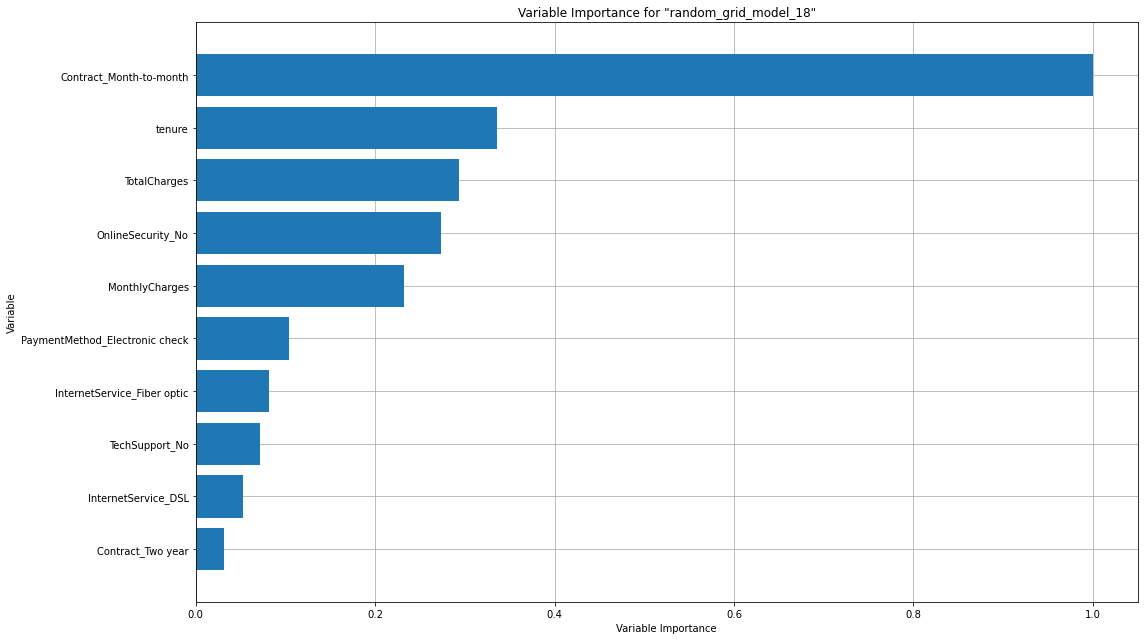

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

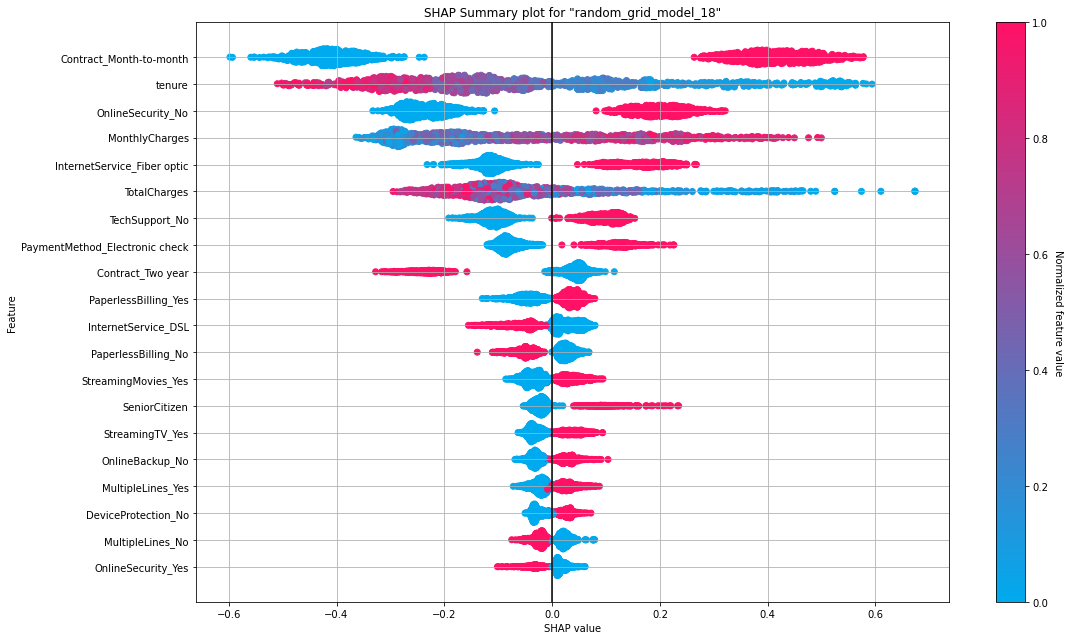

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

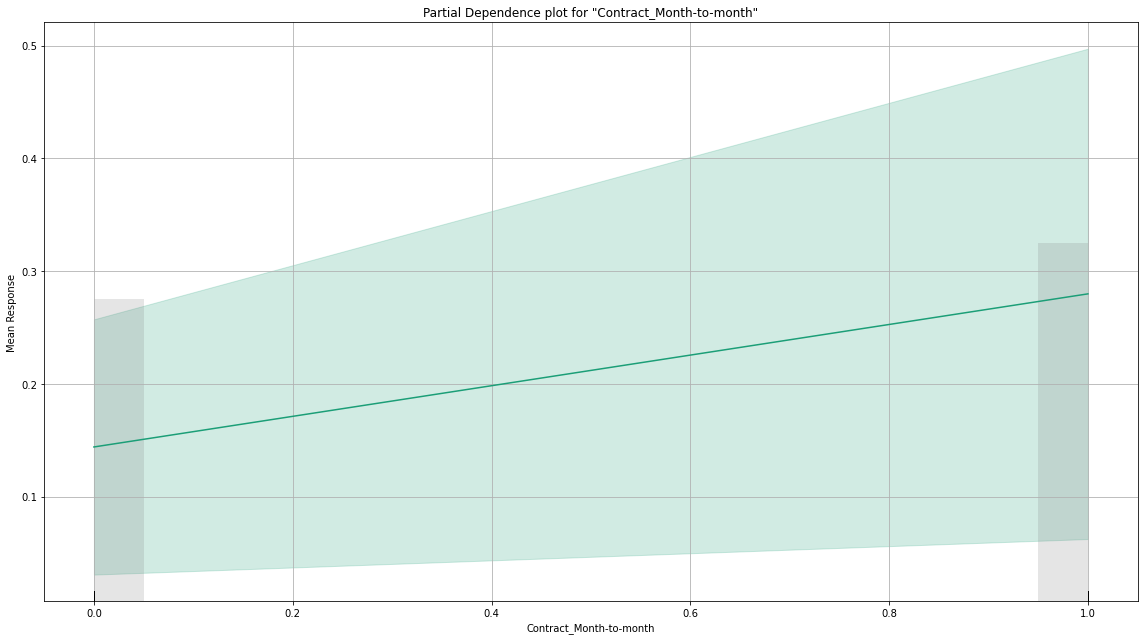

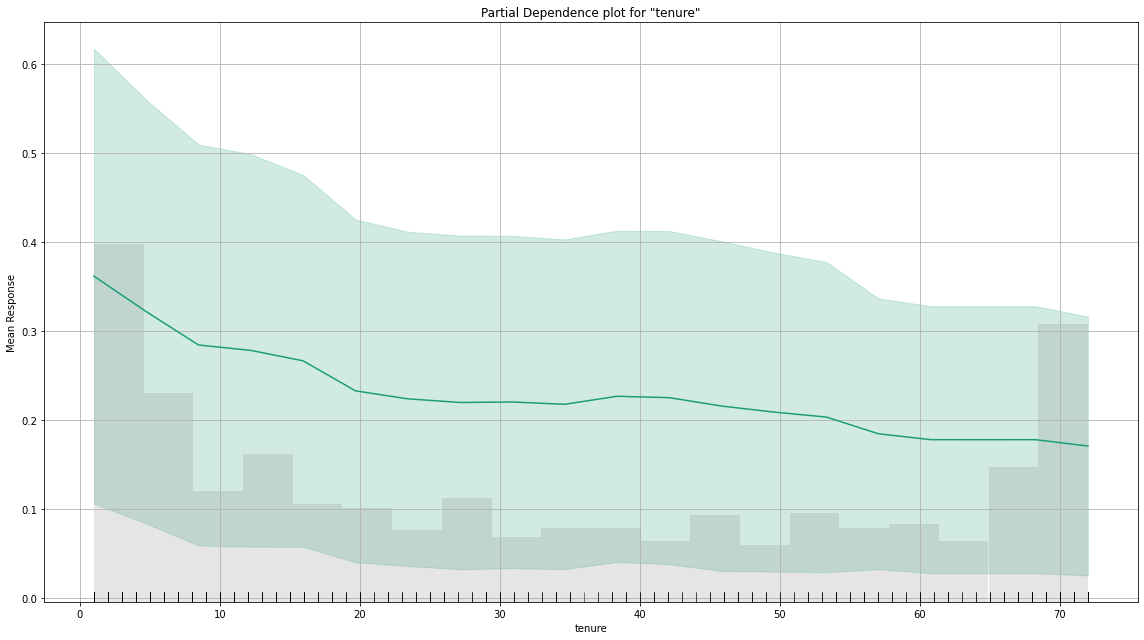

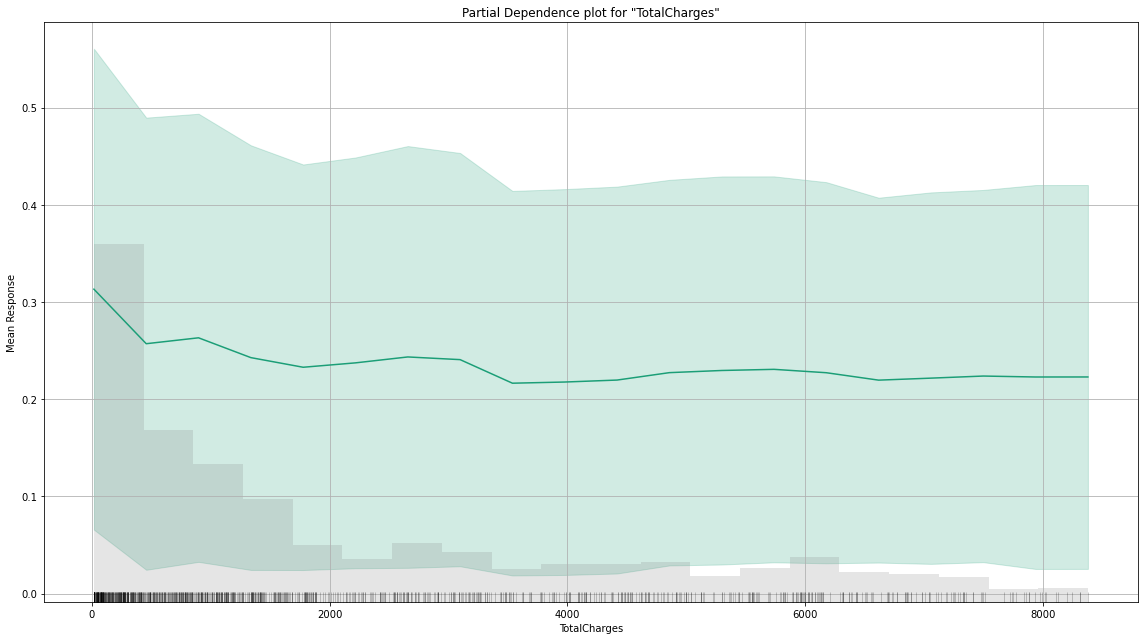

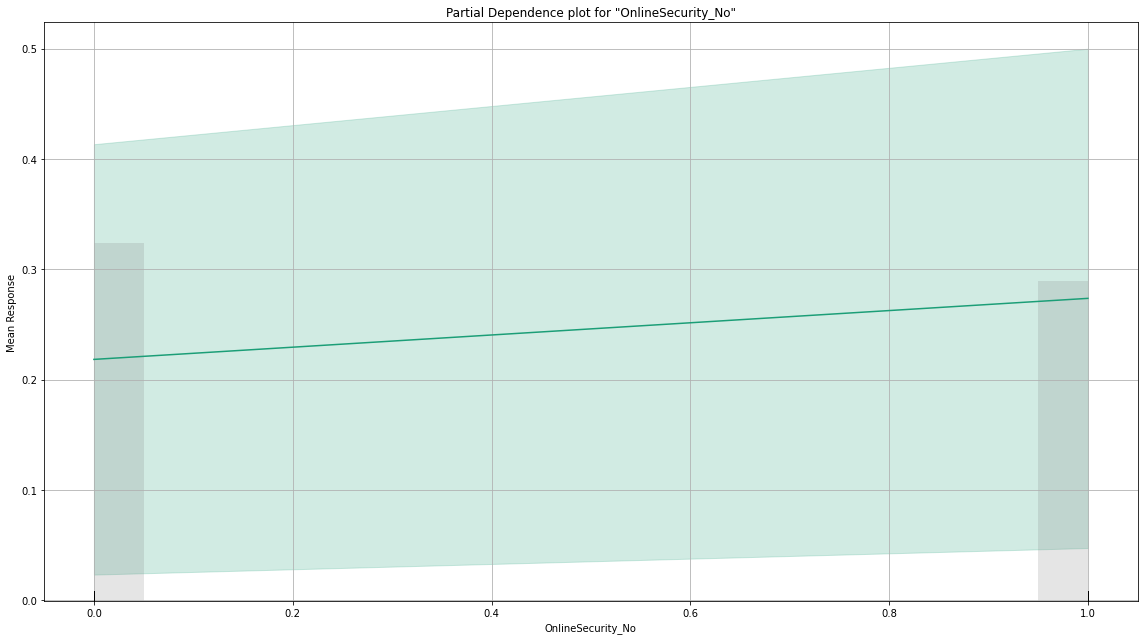

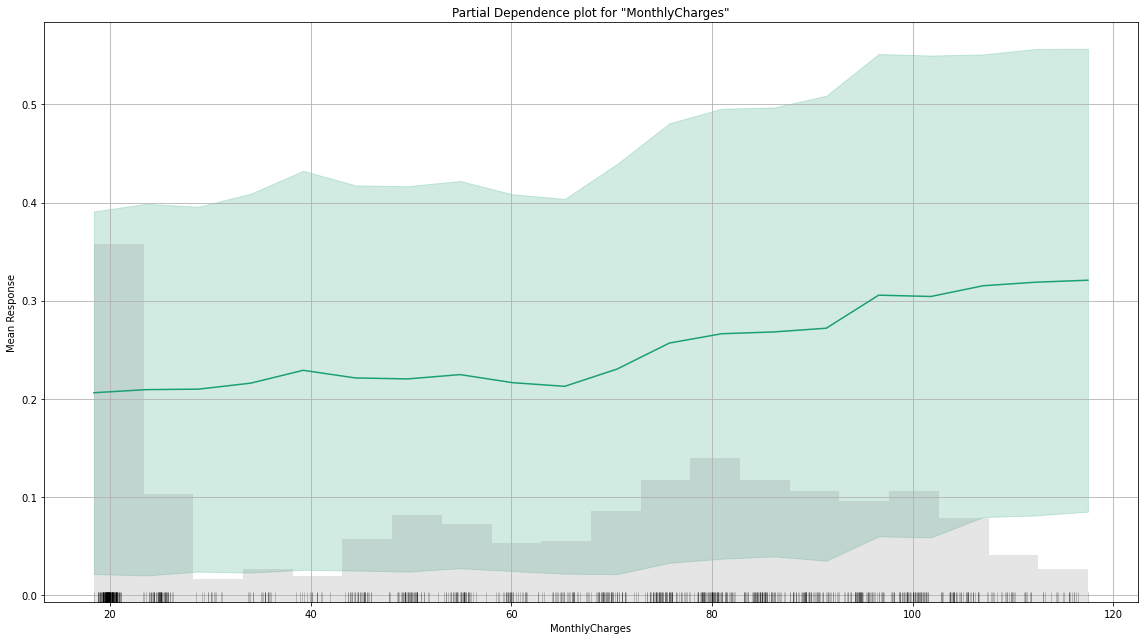

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## random_grid_model_18


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31828946293929633: 


0       1   Error             Rate
0      0  2921.0   698.0  0.1929   (698.0/3619.0)
1      1   261.0  1054.0  0.1985   (261.0/1315.0)
2  Total  3182.0  1752.0  0.1944   (959.0/4934.0)

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

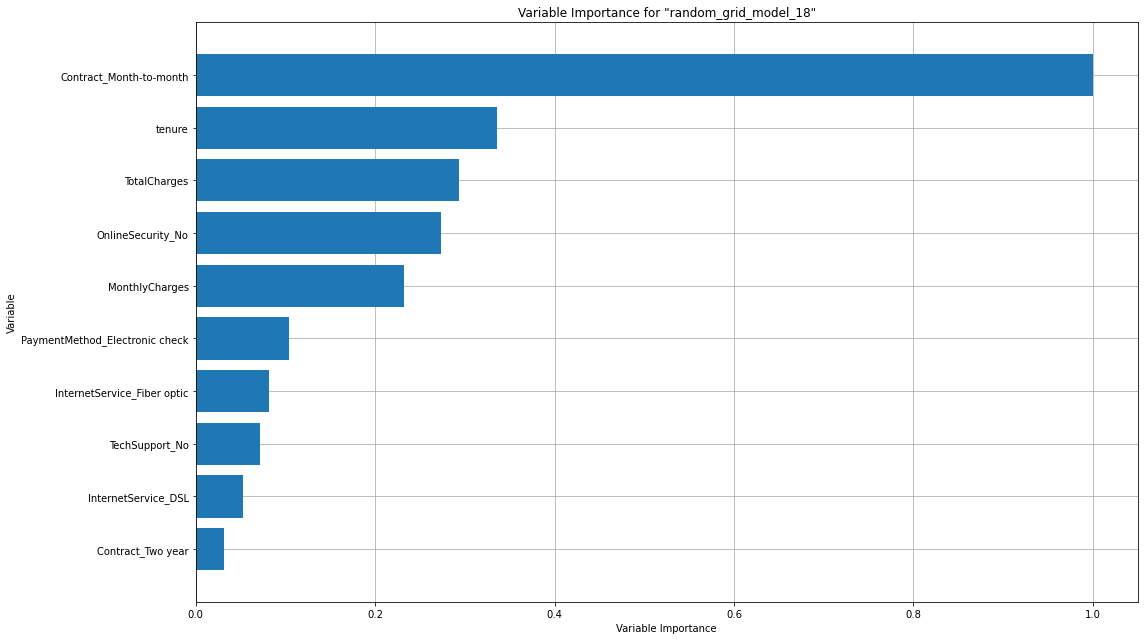

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

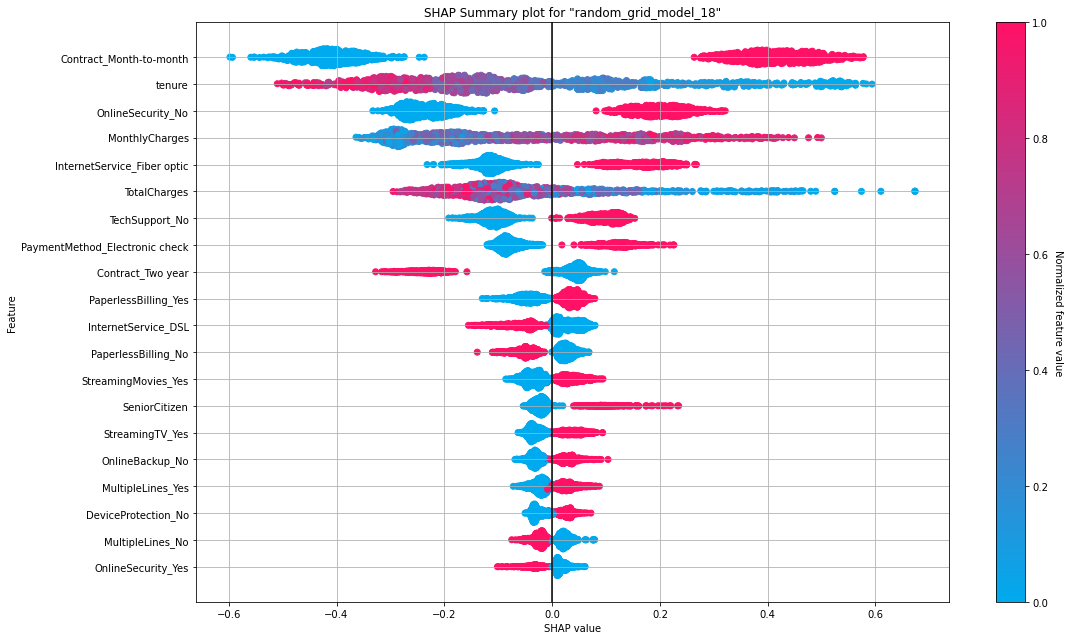

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

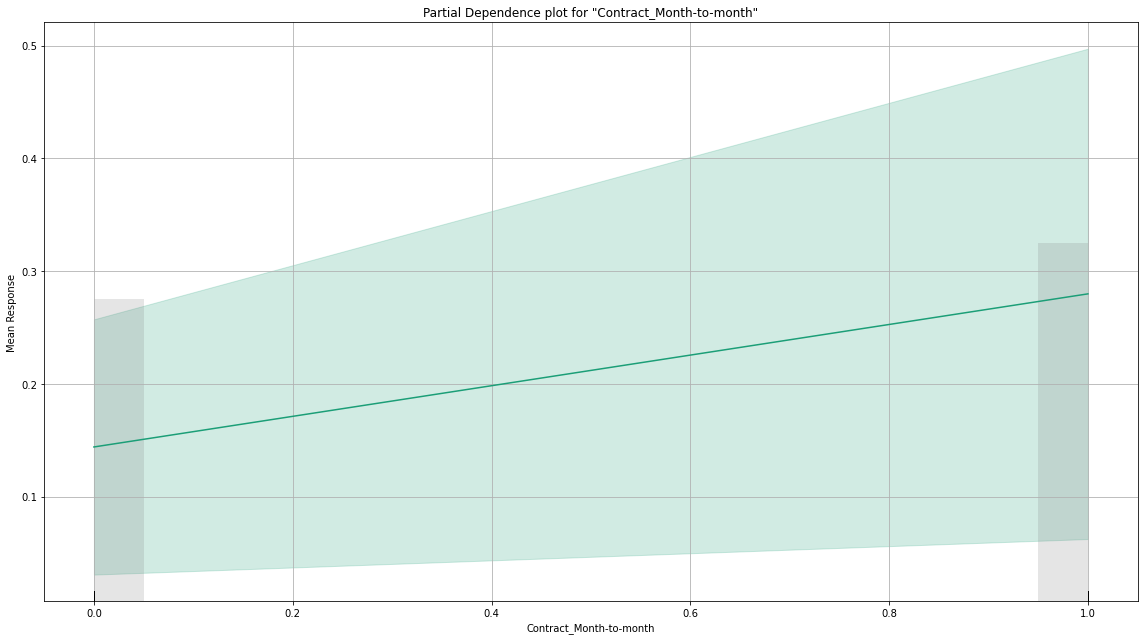

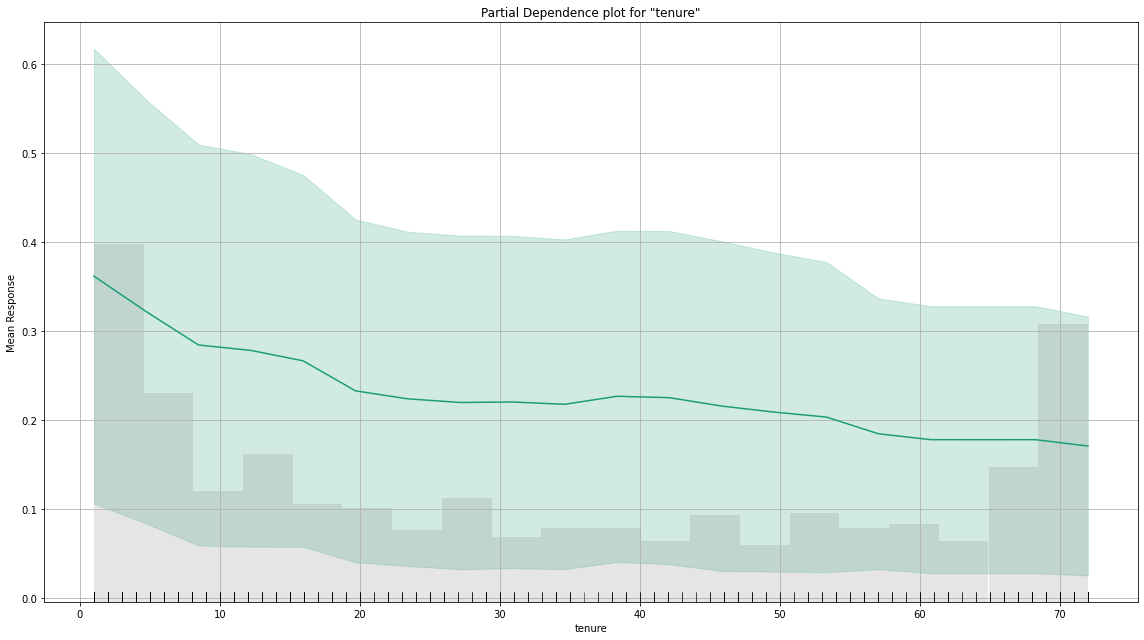

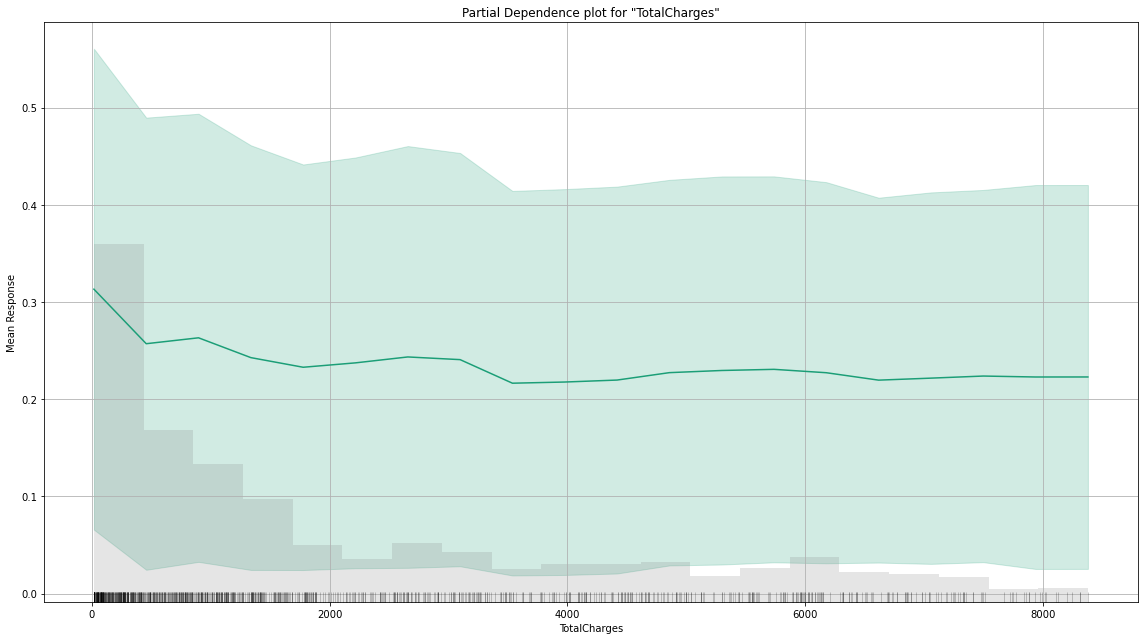

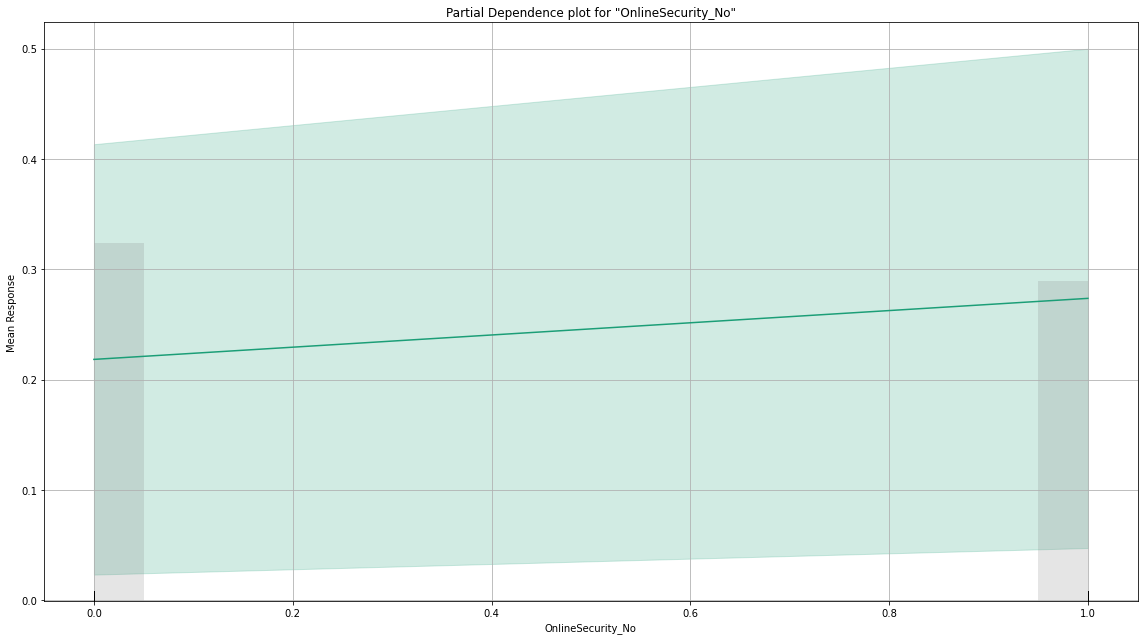

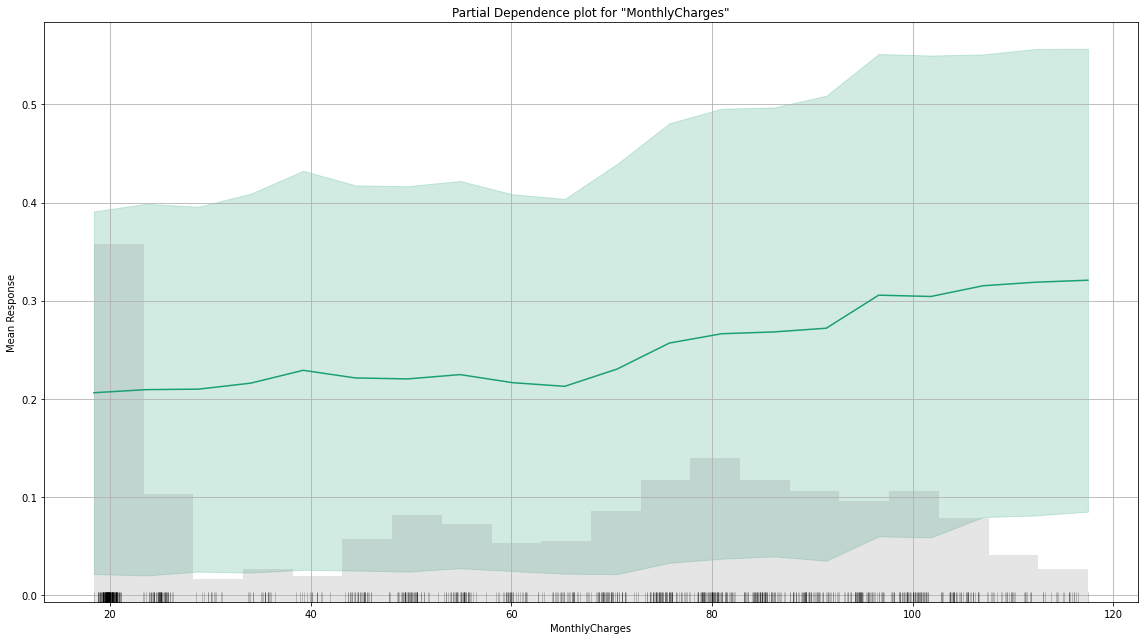

In [48]:
tuned_gbm.explain(test)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

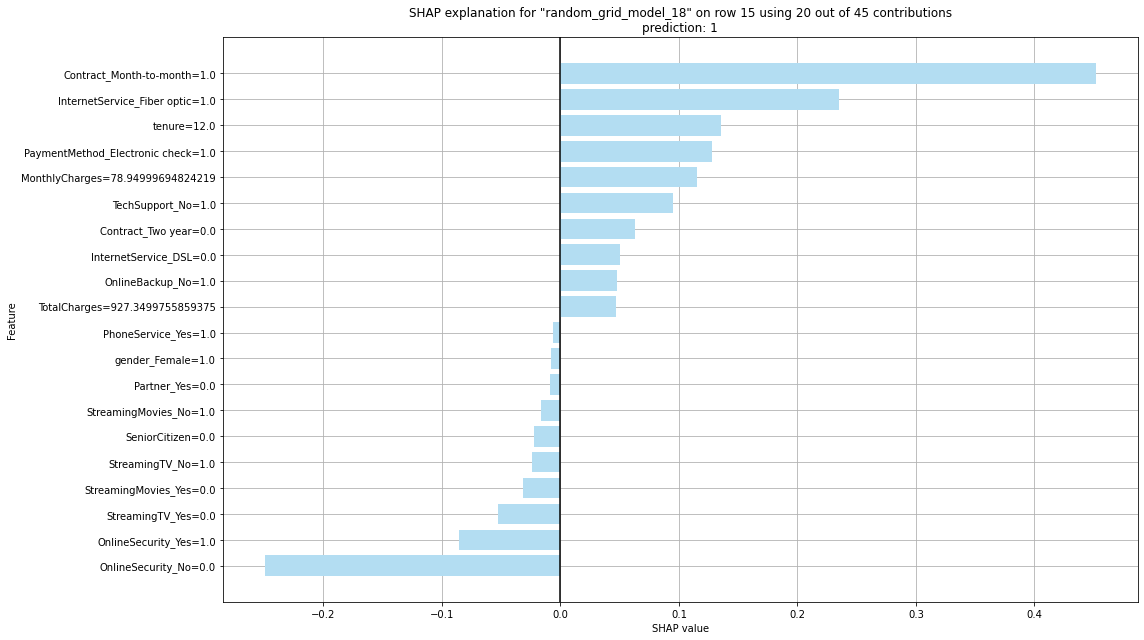

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

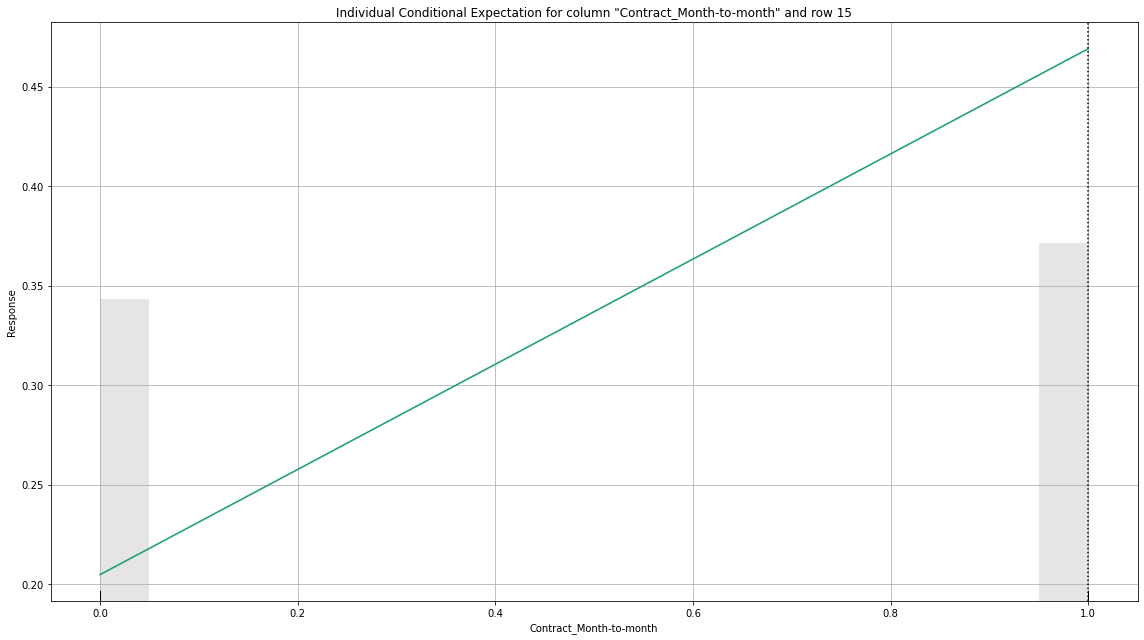

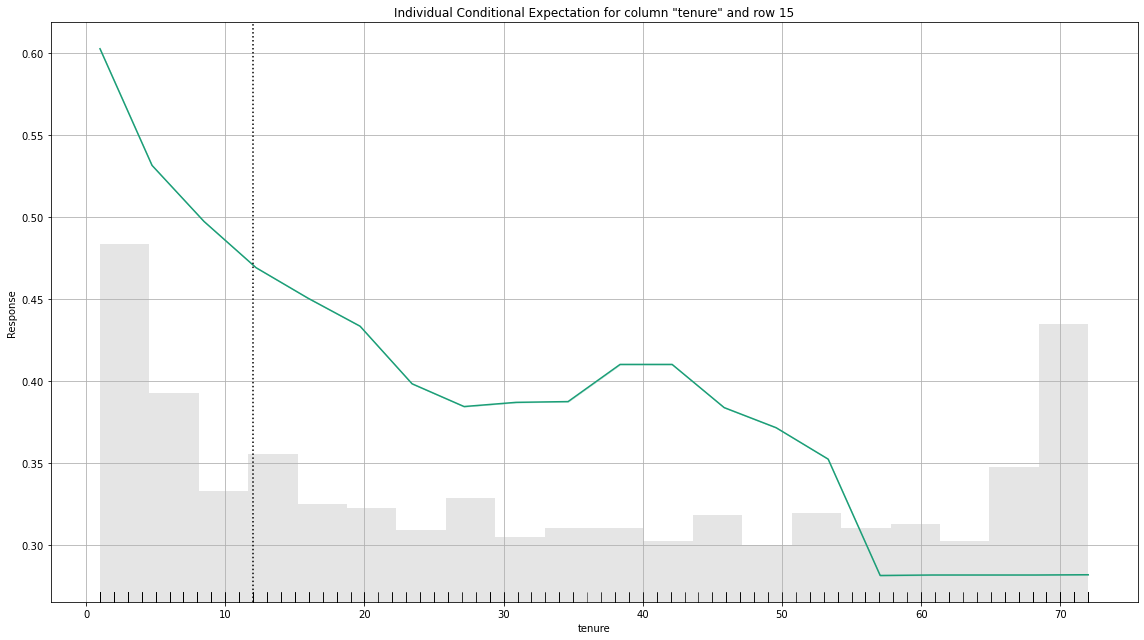

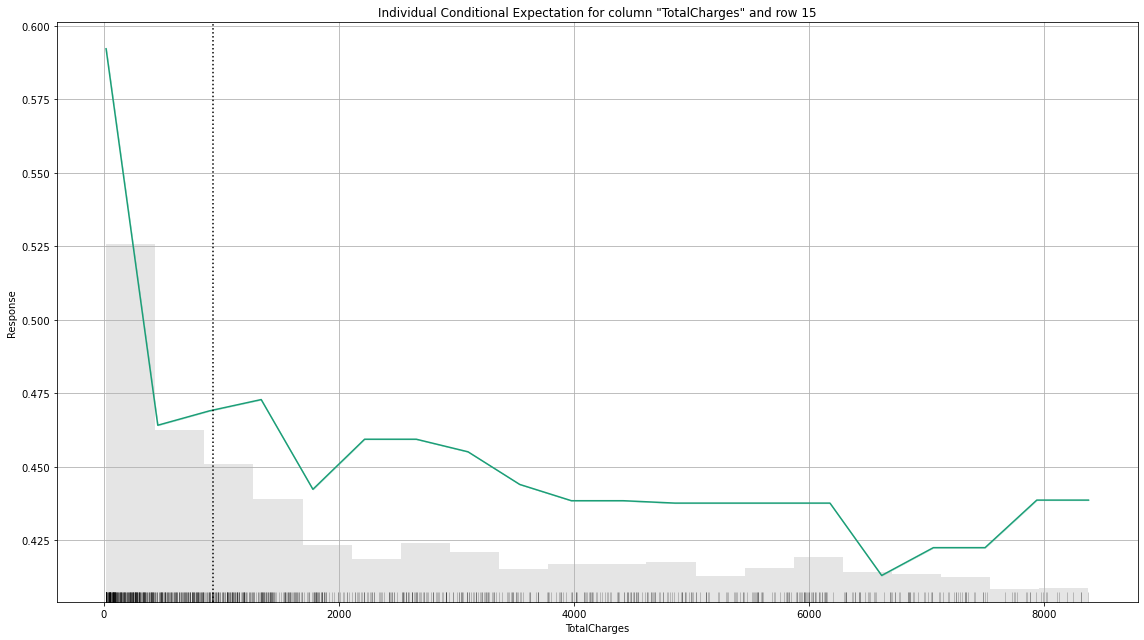

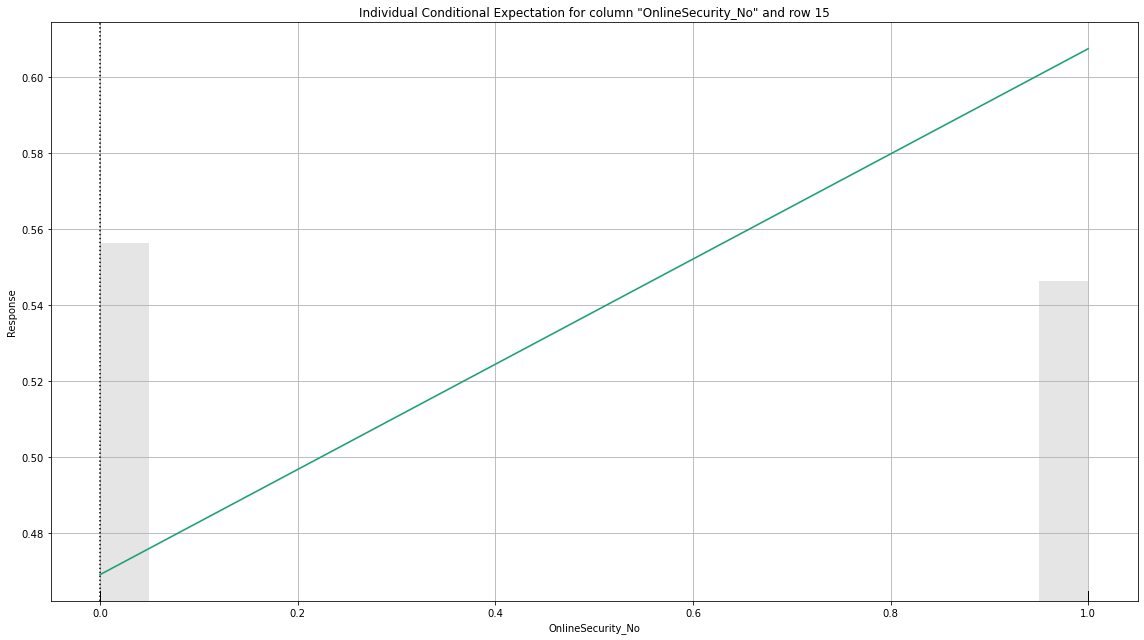

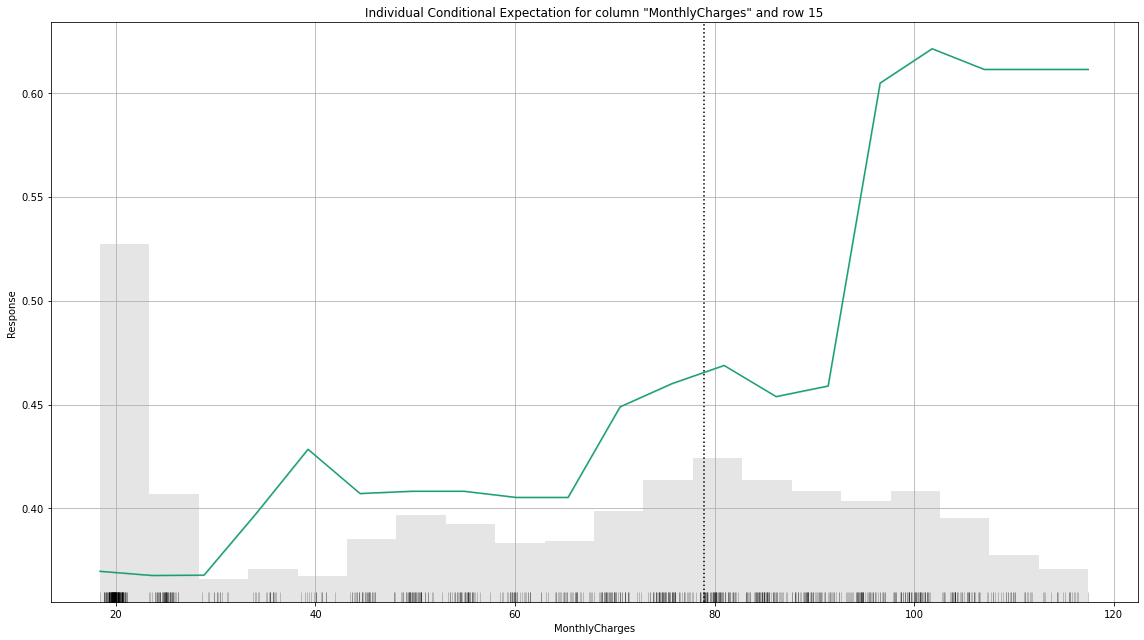

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

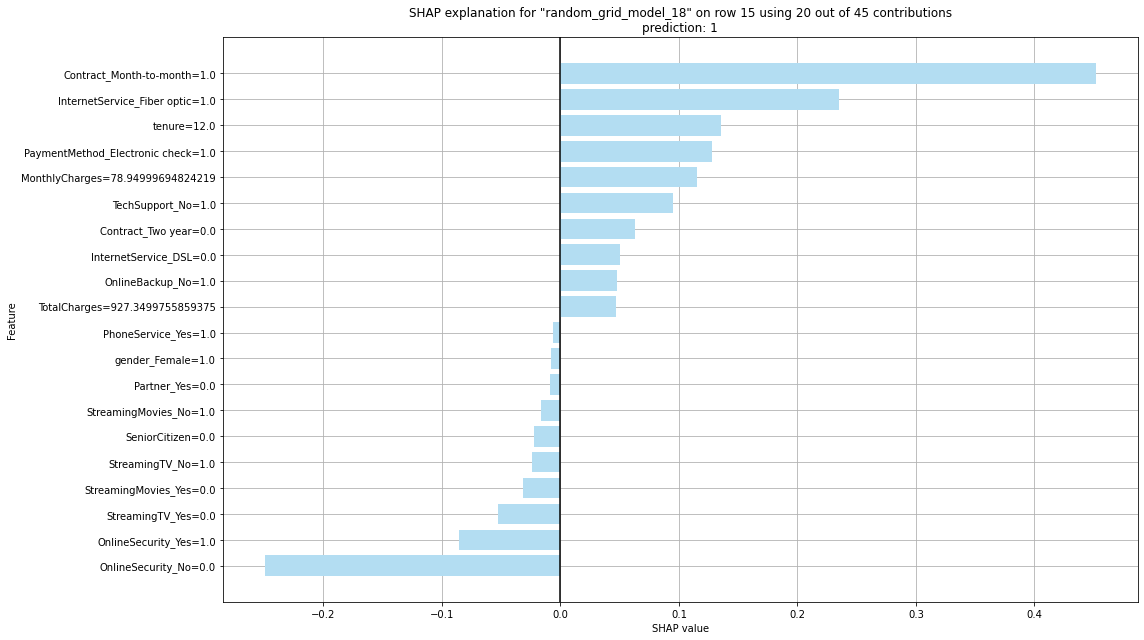

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

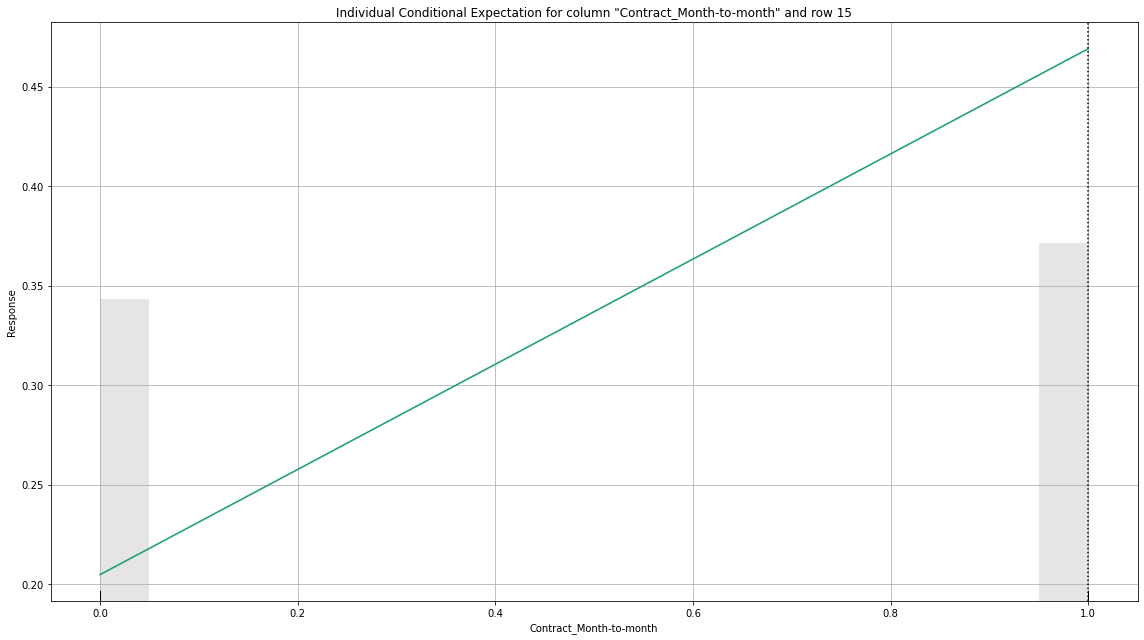

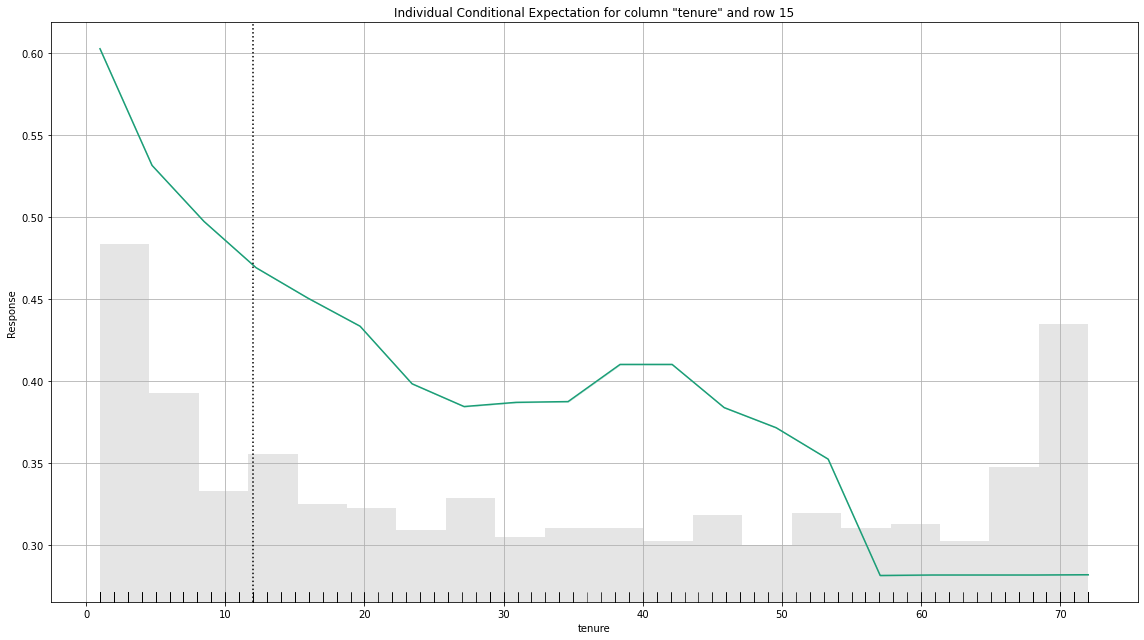

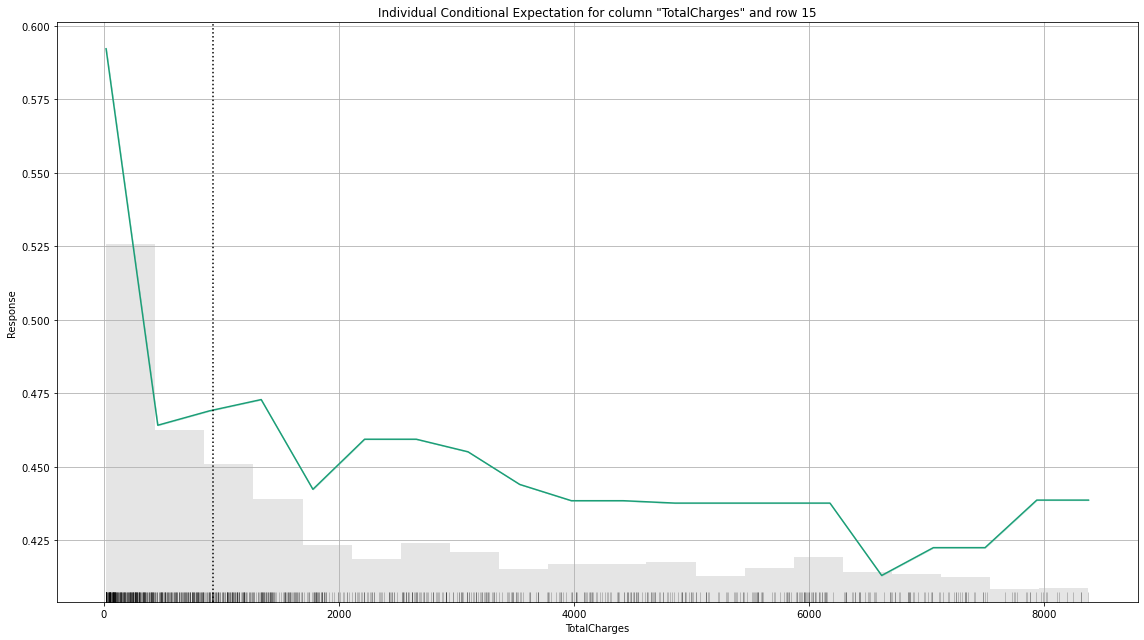

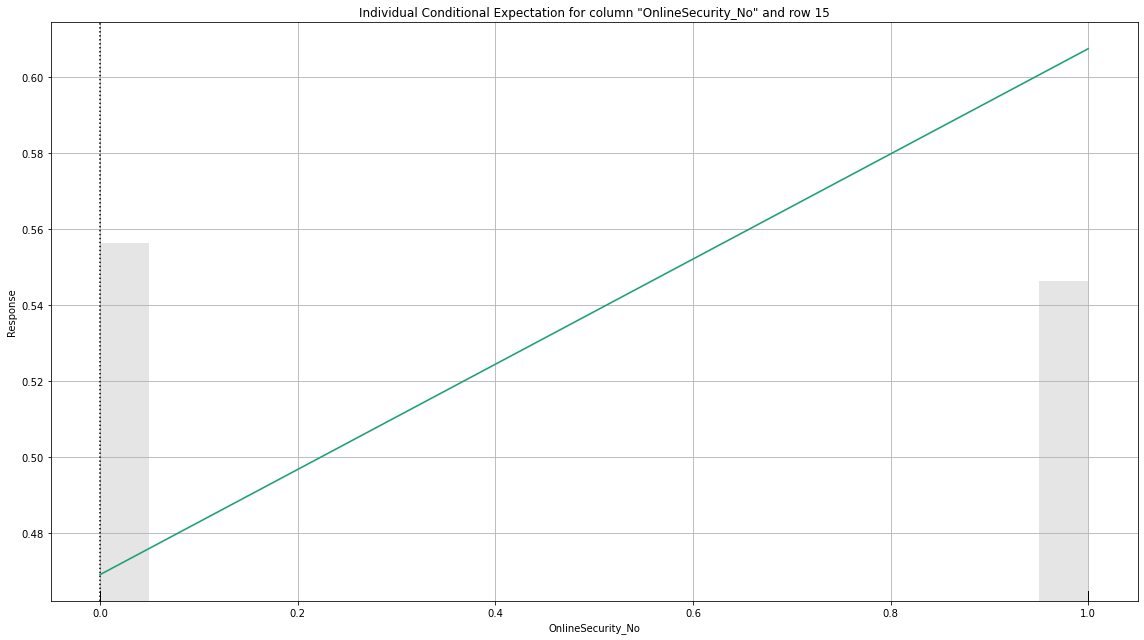

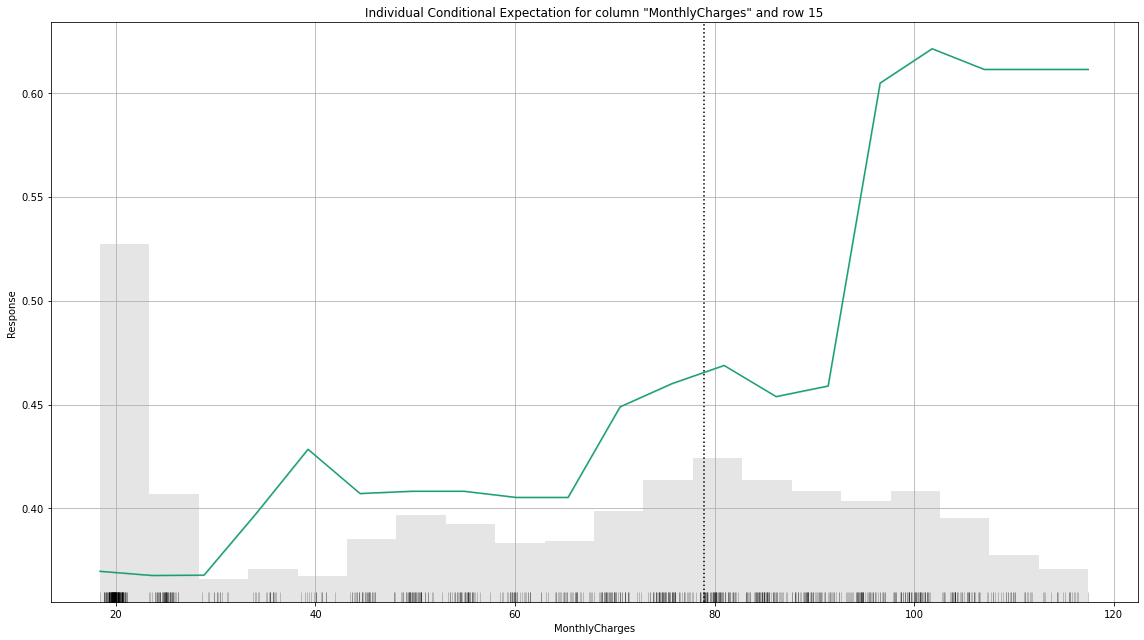

In [50]:
tuned_gbm.explain_row(test, row_index=15)

In [51]:
tuned_gbm.model_performance(test_data=dataset).confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33675573529501823: 


0       1   Error              Rate
0      0  4233.0   930.0  0.1801    (930.0/5163.0)
1      1   451.0  1418.0  0.2413    (451.0/1869.0)
2  Total  4684.0  2348.0  0.1964   (1381.0/7032.0)

In [52]:
dataset.nrows

7032

Esta matriz de confusión es para todo el conjunto que incluye el 100% de nuestros datos (7032 filas). Tenemos 1418 verdaderos positivos (20,16%): estos son los clientes para los que podremos ampliar el valor de vida útil. Si no hubiéramos predicho, entonces no había oportunidad de intervenir.

También tenemos 930 (13.2%) falsos positivos donde perderemos dinero porque la promoción ofrecida a estos clientes solo será un costo adicional.

4233 (60.1%) son verdaderos negativos (buenos clientes) y 451 (7.6%) son falsos negativos (esta es una oportunidad perdida).

En un modelo de churn, a menudo la recompensa de los verdaderos positivos es muy diferente al costo de los falsos positivos. Usemos las siguientes suposiciones:

- Se ofrecerá un cupón de \$500 a todos los clientes identificados como Churn (Verdadero Positivo + Falso Positivo)
- Si podemos detener la deserción, ganaremos \$7500 en valor de por vida para el cliente.

| Descripción                    | Clientes  | Valor | Total     |
|--------------------------------|-----------|-------|-----------|
| True Positive                  | 1418      | 7500   | 10,635,000 |
| True Positive + False Positive | 2348      | 500  | -1,174,000  |
|                                |           |       | **9,461,000** |